<H1> Capstone Project - The Battle of the Neighborhoods </H1>

Applied Data Science Capstone by IBM/Coursera
<br>
~by Gargi Shukla, April 2020


<H3> Introduction: Business Problem </H3>
<br>
This project aims to select the safest town in London based on the total crimes, explore the neighborhoods of that town to find the 10 most common venues in each neighborhood and finally cluster the neighborhoods using k-mean clustering.

This report will be targeted to people who are looking to relocate to London. Inorder to finalise a neighborhood to hunt for an apartment, safety is considered as a top concern when moving to a new place. If you don’t feel safe in your own home, you’re not going to be able to enjoy living there. The crime statistics will provide an insight into this issue.

We will focus on the safest town and explore its neighborhoods and the 10 most common venues in each neighborhood so that the best neighborhood suited to an individual's needs can be selected.

<H3>Data</H3>
Based on definition of our problem, factors that will influence our decision are:

The total number of crimes commited in each of the town during the last year.
The most common venues in each of the neighborhood in the safest town selected.
Following data sources will be needed to extract/generate the required information:

Part 1: Preprocessing a real world data set from Kaggle showing the London Crimes from 2008 to 2016: 
        A dataset consisting of the crime statistics of each town in London obtained from Kaggle

Part 2: Scraping additional information of the different towns in London from a Wikipedia page.: 
        More information regarding the towns of London is scraped using the Beautifulsoup library

Part 3: Creating a new dataset of the Neighborhoods of the safest town in London and generating their co-ordinates.: 
        Co-ordinate of neighborhood will be obtained using Google Maps API geocoding

<H3>Part 1: Preprocessing a real world data set from Kaggle showing the London Crimes from 2008 to 2016</H3>

<b>London Crime Data</b>
<b>About this file</b>

lsoa_code: code for Lower Super Output Area in Greater London.
borough: Common name for London borough.
major_category: High level categorization of crime
minor_category: Low level categorization of crime within major category.
value: monthly reported count of categorical crime in given borough
year: Year of reported counts, 2008-2016
month: Month of reported counts, 1-12

Data set URL: https://www.kaggle.com/jboysen/london-crime

In [1]:
import pandas as pd

df1 = pd.read_csv('/Users/gargishukla/Downloads/london_crime_by_lsoa.csv')
df1.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [2]:
dfs = pd.read_html('https://en.wikipedia.org/wiki/List_of_London_boroughs')
df2 = dfs[0]
df2.head()

,Borough,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Nr. in map
0,Barking and Dagenham [note 1],NaN,NaN,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,194352,51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E,25
1,Barnet,NaN,NaN,Barnet London Borough Council,Conservative,"Barnet House, 2 Bristol Avenue, Colindale",33.49,369088,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W,31
2,Bexley,NaN,NaN,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,236687,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E,23
3,Brent,NaN,NaN,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,317264,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W,12
4,Bromley,NaN,NaN,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,317899,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E,20


In [3]:
# Taking only the most recent year (2016) and dropping the rest
df1.drop(df1.index[df1['year'] != 2016], inplace = True)
df1.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
9,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8
14,E01002398,Hillingdon,Theft and Handling,Theft/Taking Of Motor Vehicle,0,2016,2


In [4]:
# Removing all the entires where crime values are null  
df1 = df1[df1.value != 0]
df1.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
9,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8
32,E01000733,Bromley,Criminal Damage,Criminal Damage To Motor Vehicle,1,2016,4
64,E01003989,Southwark,Theft and Handling,Theft From Shops,4,2016,8
112,E01002276,Havering,Burglary,Burglary in a Dwelling,1,2016,8
224,E01003674,Redbridge,Drugs,Possession Of Drugs,2,2016,11


In [5]:
# Reset the index and dropping the previous index
df1 = df1.reset_index(drop=True)
df1.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8
1,E01000733,Bromley,Criminal Damage,Criminal Damage To Motor Vehicle,1,2016,4
2,E01003989,Southwark,Theft and Handling,Theft From Shops,4,2016,8
3,E01002276,Havering,Burglary,Burglary in a Dwelling,1,2016,8
4,E01003674,Redbridge,Drugs,Possession Of Drugs,2,2016,11


In [6]:
# Shape of the data frame
df1.shape

(392042, 7)

In [7]:
#changing column name
df1.columns = ['LSOA_Code', 'Town','Major_Category','Minor_Category','No_of_Crimes','Year','Month']
df1.head()

,LSOA_Code,Town,Major_Category,Minor_Category,No_of_Crimes,Year,Month
0,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8
1,E01000733,Bromley,Criminal Damage,Criminal Damage To Motor Vehicle,1,2016,4
2,E01003989,Southwark,Theft and Handling,Theft From Shops,4,2016,8
3,E01002276,Havering,Burglary,Burglary in a Dwelling,1,2016,8
4,E01003674,Redbridge,Drugs,Possession Of Drugs,2,2016,11


In [8]:
df2.head()

,Borough,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Nr. in map
0,Barking and Dagenham [note 1],NaN,NaN,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,194352,51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E,25
1,Barnet,NaN,NaN,Barnet London Borough Council,Conservative,"Barnet House, 2 Bristol Avenue, Colindale",33.49,369088,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W,31
2,Bexley,NaN,NaN,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,236687,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E,23
3,Brent,NaN,NaN,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,317264,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W,12
4,Bromley,NaN,NaN,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,317899,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E,20


In [9]:
df2.columns=['Town','Inner','Status','Local authority', 'Political control','Headquaters', 'Area (sq mi)', 'Population (2013 est)',
             'Co-ordinates','Nr. in map']
df2.head()

,Town,Inner,Status,Local authority,Political control,Headquaters,Area (sq mi),Population (2013 est),Co-ordinates,Nr. in map
0,Barking and Dagenham [note 1],NaN,NaN,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,194352,51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E,25
1,Barnet,NaN,NaN,Barnet London Borough Council,Conservative,"Barnet House, 2 Bristol Avenue, Colindale",33.49,369088,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W,31
2,Bexley,NaN,NaN,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,236687,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E,23
3,Brent,NaN,NaN,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,317264,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W,12
4,Bromley,NaN,NaN,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,317899,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E,20


In [10]:
import numpy as np
London_crime = pd.pivot_table(df1,values=['No_of_Crimes'], index=['Town'], columns=['Major_Category'],
                              aggfunc=np.sum,fill_value=0)
London_crime.head()

No_of_Crimes                        \
Major_Category           Burglary Criminal Damage Drugs   
Town                                                      
Barking and Dagenham         1287            1949   919   
Barnet                       3402            2183   906   
Bexley                       1123            1673   646   
Brent                        2631            2280  2096   
Bromley                      2214            2202   728   

                                                                           \
Major_Category       Other Notifiable Offences Robbery Theft and Handling   
Town                                                                        
Barking and Dagenham                       378     534               5607   
Barnet                                     499     464               9731   
Bexley                                     294     209               4392   
Brent                                      536     919               9026   
Bromley                                    417     369               7584   

                                                  
Major_Category       Violence Against the Person  
Town                                              
Barking and Dagenham                        6067  
Barnet                                      7499  
Bexley                                      4503  
Brent                                       9205  
Bromley                                     6650

In [11]:
# Reset the index
London_crime.reset_index(inplace = True)
London_crime.head()

Town No_of_Crimes                        \
Major_Category                           Burglary Criminal Damage Drugs   
0               Barking and Dagenham         1287            1949   919   
1                             Barnet         3402            2183   906   
2                             Bexley         1123            1673   646   
3                              Brent         2631            2280  2096   
4                            Bromley         2214            2202   728   

                                                                     \
Major_Category Other Notifiable Offences Robbery Theft and Handling   
0                                    378     534               5607   
1                                    499     464               9731   
2                                    294     209               4392   
3                                    536     919               9026   
4                                    417     369               7584   

                                            
Major_Category Violence Against the Person  
0                                     6067  
1                                     7499  
2                                     4503  
3                                     9205  
4                                     6650

In [12]:
London_crime['Total'] = London_crime.sum(axis=1)
London_crime.head()

Town No_of_Crimes                        \
Major_Category                           Burglary Criminal Damage Drugs   
0               Barking and Dagenham         1287            1949   919   
1                             Barnet         3402            2183   906   
2                             Bexley         1123            1673   646   
3                              Brent         2631            2280  2096   
4                            Bromley         2214            2202   728   

                                                                     \
Major_Category Other Notifiable Offences Robbery Theft and Handling   
0                                    378     534               5607   
1                                    499     464               9731   
2                                    294     209               4392   
3                                    536     919               9026   
4                                    417     369               7584   

                                            Total  
Major_Category Violence Against the Person         
0                                     6067  16741  
1                                     7499  24684  
2                                     4503  12840  
3                                     9205  26693  
4                                     6650  20164

In [13]:
London_crime.columns = London_crime.columns.map(''.join)
London_crime.head()

,Town,No_of_CrimesBurglary,No_of_CrimesCriminal Damage,No_of_CrimesDrugs,No_of_CrimesOther Notifiable Offences,No_of_CrimesRobbery,No_of_CrimesTheft and Handling,No_of_CrimesViolence Against the Person,Total
0,Barking and Dagenham,1287,1949,919,378,534,5607,6067,16741
1,Barnet,3402,2183,906,499,464,9731,7499,24684
2,Bexley,1123,1673,646,294,209,4392,4503,12840
3,Brent,2631,2280,2096,536,919,9026,9205,26693
4,Bromley,2214,2202,728,417,369,7584,6650,20164


In [14]:
London_crime.columns = ['Town','Burglary','Criminal Damage','Drugs','Other Notifiable Offences','Robbery','Theft and Handling','Violence Against the Person','Total']
London_crime.head()

,Town,Burglary,Criminal Damage,Drugs,Other Notifiable Offences,Robbery,Theft and Handling,Violence Against the Person,Total
0,Barking and Dagenham,1287,1949,919,378,534,5607,6067,16741
1,Barnet,3402,2183,906,499,464,9731,7499,24684
2,Bexley,1123,1673,646,294,209,4392,4503,12840
3,Brent,2631,2280,2096,536,919,9026,9205,26693
4,Bromley,2214,2202,728,417,369,7584,6650,20164


In [15]:
#df2.head(30)

In [16]:
df2 = df2.replace('note 1','', regex=True) 
df2 = df2.replace('note 2','', regex=True) 
df2 = df2.replace('note 3','', regex=True) 
df2 = df2.replace('note 4','', regex=True) 
df2 = df2.replace('note 5','', regex=True) 

# View the top of the data set
df2.head()

,Town,Inner,Status,Local authority,Political control,Headquaters,Area (sq mi),Population (2013 est),Co-ordinates,Nr. in map
0,Barking and Dagenham [],NaN,NaN,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,194352,51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E,25
1,Barnet,NaN,NaN,Barnet London Borough Council,Conservative,"Barnet House, 2 Bristol Avenue, Colindale",33.49,369088,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W,31
2,Bexley,NaN,NaN,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,236687,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E,23
3,Brent,NaN,NaN,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,317264,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W,12
4,Bromley,NaN,NaN,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,317899,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E,20


In [17]:
final = pd.merge(London_crime, df2 , on='Town')
final.head()

,Town,Burglary,Criminal Damage,Drugs,Other Notifiable Offences,Robbery,Theft and Handling,Violence Against the Person,Total,Inner,Status,Local authority,Political control,Headquaters,Area (sq mi),Population (2013 est),Co-ordinates,Nr. in map
0,Barnet,3402,2183,906,499,464,9731,7499,24684,NaN,NaN,Barnet London Borough Council,Conservative,"Barnet House, 2 Bristol Avenue, Colindale",33.49,369088,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W,31
1,Bexley,1123,1673,646,294,209,4392,4503,12840,NaN,NaN,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,236687,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E,23
2,Brent,2631,2280,2096,536,919,9026,9205,26693,NaN,NaN,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,317264,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W,12
3,Bromley,2214,2202,728,417,369,7584,6650,20164,NaN,NaN,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,317899,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E,20
4,Camden,2652,1935,1493,490,899,14088,7626,29183,NaN,NaN,Camden London Borough Council,Labour,"Camden Town Hall, Judd Street",8.40,229719,51°31′44″N 0°07′32″W﻿ / ﻿51.5290°N 0.1255°W,11


In [18]:
final.shape

(29, 18)

In [19]:
set(London_crime.Town) - set(final.Town)

{'Barking and Dagenham',
 'City of London',
 'Greenwich',
 'Hammersmith and Fulham'}

In [20]:
df2.iloc[0,0] = 'Barking and Dagenham'
df2.head()

,Town,Inner,Status,Local authority,Political control,Headquaters,Area (sq mi),Population (2013 est),Co-ordinates,Nr. in map
0,Barking and Dagenham,NaN,NaN,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,194352,51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E,25
1,Barnet,NaN,NaN,Barnet London Borough Council,Conservative,"Barnet House, 2 Bristol Avenue, Colindale",33.49,369088,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W,31
2,Bexley,NaN,NaN,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,236687,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E,23
3,Brent,NaN,NaN,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,317264,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W,12
4,Bromley,NaN,NaN,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,317899,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E,20


In [21]:
print(London_crime.loc[London_crime['Town'] == 'Barking and Dagenham []'])

Empty DataFrame
Columns: [Town, Burglary, Criminal Damage, Drugs, Other Notifiable Offences, Robbery, Theft and Handling, Violence Against the Person, Total]
Index: []


In [22]:
df2.index[df2['Town'] == 'Greenwich []'].tolist()

[9]

In [23]:
df2.iloc[9,0] = 'Greenwich'

In [24]:
df2.index[df2['Town'] == 'Hammersmith and Fulham []'].tolist()

[11]

In [25]:
df2.iloc[11,0] = 'Hammersmith and Fulham'

In [26]:
final = pd.merge(London_crime, df2 , on='Town')
final.head()
set(London_crime.Town) - set(final.Town)

{'City of London'}

In [27]:
London_crime.index[London_crime['Town'] == 'City of London'].tolist()

[6]

In [107]:
#final.drop(['level_0','index'], axis = 1, inplace= True)#inplace= True makes changes in original dataframe

In [29]:
final = pd.merge(London_crime, df2 , on='Town')
final.head()
set(London_crime.Town) - set(final.Town)

{'City of London'}

In [108]:
final.head()

,Town,Burglary,Criminal Damage,Drugs,Other Notifiable Offences,Robbery,Theft and Handling,Violence Against the Person,Total,Inner,Status,Local authority,Political control,Headquaters,Area (sq mi),Population (2013 est),Co-ordinates,Nr. in map
0,Barking and Dagenham,1287,1949,919,378,534,5607,6067,16741,NaN,NaN,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,194352,51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E,25
1,Barnet,3402,2183,906,499,464,9731,7499,24684,NaN,NaN,Barnet London Borough Council,Conservative,"Barnet House, 2 Bristol Avenue, Colindale",33.49,369088,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W,31
2,Bexley,1123,1673,646,294,209,4392,4503,12840,NaN,NaN,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,236687,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E,23
3,Brent,2631,2280,2096,536,919,9026,9205,26693,NaN,NaN,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,317264,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W,12
4,Bromley,2214,2202,728,417,369,7584,6650,20164,NaN,NaN,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,317899,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E,20


<h3><u>Methodology </u></h3>
The methodology in this project consists of two parts:

1. <b>Exploratory Data Analysis:</b>Visualise the crime rates in the London boroughs to idenity the safest borough and extract the neighborhoods in that borough to find the 10 most common venues in each neighborhood.
<br><br>
2. <b>Modelling:</b> To help people find similar neighborhoods in the safest borough we will be clustering similar neighborhoods using K - means clustering which is a form of unsupervised machine learning algorithm that clusters data based on predefined cluster size. We will use a cluster size of 5 for this project that will cluster the 15 neighborhoods into 5 clusters. The reason to conduct a K- means clustering is to cluster neighborhoods with similar venues together so that people can shortlist the area of their interests based on the venues/amenities around each neighborhood.

<h3>Exploratory Data Analysis </h3>


In [30]:
final.describe()

,Burglary,Criminal Damage,Drugs,Other Notifiable Offences,Robbery,Theft and Handling,Violence Against the Person,Total,Area (sq mi),Population (2013 est),Nr. in map
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,2133.843750,2002.156250,1215.750000,493.843750,703.875000,9187.625000,7261.125000,22998.218750,18.948750,262777.718750,17.500000
std,647.464988,527.590085,556.316863,209.824367,431.068496,4412.649798,2210.002011,8010.119055,12.454741,57346.611409,9.380832
min,879.000000,1051.000000,320.000000,189.000000,106.000000,3516.000000,3155.000000,9983.000000,4.680000,155594.000000,2.000000
25%,1717.750000,1667.250000,836.000000,380.250000,388.250000,6997.500000,6034.250000,18852.250000,10.945000,224047.500000,9.750000
50%,2093.000000,2062.500000,1074.500000,491.000000,600.500000,8975.500000,7454.000000,23204.500000,14.755000,263697.000000,17.500000
75%,2636.250000,2352.500000,1620.000000,566.500000,959.500000,10830.000000,8925.250000,27446.750000,21.877500,311447.500000,25.250000
max,3402.000000,3219.000000,2738.000000,1305.000000,1822.000000,27520.000000,10834.000000,48330.000000,57.970000,372752.000000,33.000000


In [31]:
#Top 5 dangerous cities in London
top=final.nlargest(5,'Total')
top

,Town,Burglary,Criminal Damage,Drugs,Other Notifiable Offences,Robbery,Theft and Handling,Violence Against the Person,Total,Inner,Status,Local authority,Political control,Headquaters,Area (sq mi),Population (2013 est),Co-ordinates,Nr. in map
31,Westminster,3218,2179,2049,708,1822,27520,10834,48330,NaN,City,Westminster City Council,Conservative,"Westminster City Hall, 64 Victoria Street",8.29,226841,51°29′50″N 0°08′14″W﻿ / ﻿51.4973°N 0.1372°W,2
20,Lambeth,3087,2764,2738,635,1196,13155,10496,34071,NaN,NaN,Lambeth London Borough Council,Labour,"Lambeth Town Hall, Brixton Hill",10.36,314242,51°27′39″N 0°06′59″W﻿ / ﻿51.4607°N 0.1163°W,6
26,Southwark,2946,2621,1838,494,1317,12946,9474,31636,NaN,NaN,Southwark London Borough Council,Labour,160 Tooley Street,11.14,298464,51°30′13″N 0°04′49″W﻿ / ﻿51.5035°N 0.0804°W,7
23,Newham,2115,2496,1684,713,1472,11964,9646,30090,[],NaN,Newham London Borough Council,Labour,"Newham Dockside, 1000 Dockside Road",13.98,318227,51°30′28″N 0°02′49″E﻿ / ﻿51.5077°N 0.0469°E,27
28,Tower Hamlets,2794,2357,1629,678,1234,10953,9608,29253,NaN,NaN,Tower Hamlets London Borough Council,Labour,"Town Hall, Mulberry Place, 5 Clove Crescent",7.63,272890,51°30′36″N 0°00′21″W﻿ / ﻿51.5099°N 0.0059°W,8


(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

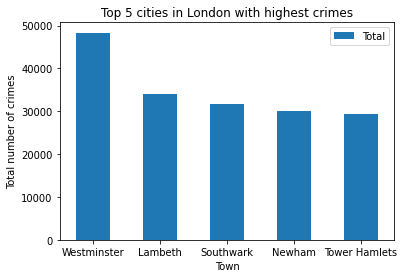

In [32]:
import matplotlib.pyplot as plt

top.plot(kind='bar', x = 'Town', y = 'Total')
plt.title('Top 5 cities in London with highest crimes')
plt.ylabel('Total number of crimes')
plt.xticks(rotation = 0)


In [33]:
#final.sort_values('Total', ascending = True, inplace = True, na_position = 'last')
final.sort_values('Town', ascending = True, inplace = True, na_position = 'last')

In [34]:
#Top 5 safest cities in London
safe = final.nsmallest(5, 'Total')
safe

,Town,Burglary,Criminal Damage,Drugs,Other Notifiable Offences,Robbery,Theft and Handling,Violence Against the Person,Total,Inner,Status,Local authority,Political control,Headquaters,Area (sq mi),Population (2013 est),Co-ordinates,Nr. in map
19,Kingston upon Thames,879,1054,743,189,121,3803,3194,9983,NaN,Royal,Kingston upon Thames London Borough Council,Liberal Democrat,"Guildhall, High Street",14.38,166793,51°24′31″N 0°18′23″W﻿ / ﻿51.4085°N 0.3064°W,16
27,Sutton,1233,1316,461,253,165,3516,3714,10658,NaN,NaN,Sutton London Borough Council,Liberal Democrat,"Civic Offices, St Nicholas Way",16.93,195914,51°21′42″N 0°11′40″W﻿ / ﻿51.3618°N 0.1945°W,18
25,Richmond upon Thames,1359,1148,320,217,106,4769,3155,11074,NaN,NaN,Richmond upon Thames London Borough Council,Liberal Democrat,"Civic Centre, 44 York Street",22.17,191365,51°26′52″N 0°19′34″W﻿ / ﻿51.4479°N 0.3260°W,15
22,Merton,1419,1418,466,249,283,4894,4026,12755,NaN,NaN,Merton London Borough Council,Labour,"Civic Centre, London Road",14.52,203223,51°24′05″N 0°11′45″W﻿ / ﻿51.4014°N 0.1958°W,17
2,Bexley,1123,1673,646,294,209,4392,4503,12840,NaN,NaN,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,236687,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E,23


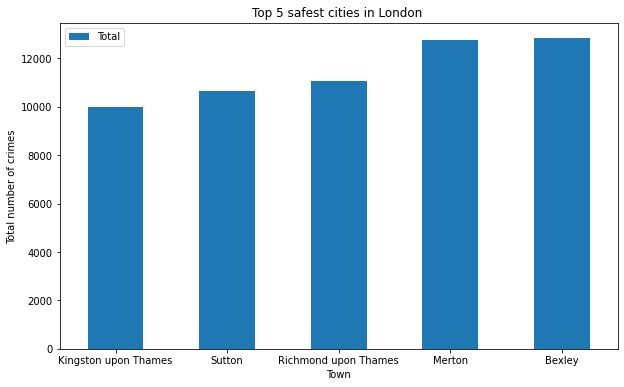

In [35]:
import matplotlib.pyplot as plt

safe.plot(kind='bar', x = 'Town', y = 'Total', figsize=(10, 6), rot = 0)
plt.title('Top 5 safest cities in London ')
plt.ylabel('Total number of crimes')
#plt.xticks(rotation = 45)
x = safe['Town']
y = safe['Total']
plt.show()


<h3>Visualizing different types of crimes in 'Kingston upon Thames' </h3>

In [36]:
king = final.loc[final['Town']=='Kingston upon Thames']
king

,Town,Burglary,Criminal Damage,Drugs,Other Notifiable Offences,Robbery,Theft and Handling,Violence Against the Person,Total,Inner,Status,Local authority,Political control,Headquaters,Area (sq mi),Population (2013 est),Co-ordinates,Nr. in map
19,Kingston upon Thames,879,1054,743,189,121,3803,3194,9983,NaN,Royal,Kingston upon Thames London Borough Council,Liberal Democrat,"Guildhall, High Street",14.38,166793,51°24′31″N 0°18′23″W﻿ / ﻿51.4085°N 0.3064°W,16


In [37]:
result = king[['Town','Burglary','Criminal Damage','Drugs','Other Notifiable Offences', 'Robbery','Theft and Handling','Violence Against the Person']]
result

,Town,Burglary,Criminal Damage,Drugs,Other Notifiable Offences,Robbery,Theft and Handling,Violence Against the Person
19,Kingston upon Thames,879,1054,743,189,121,3803,3194


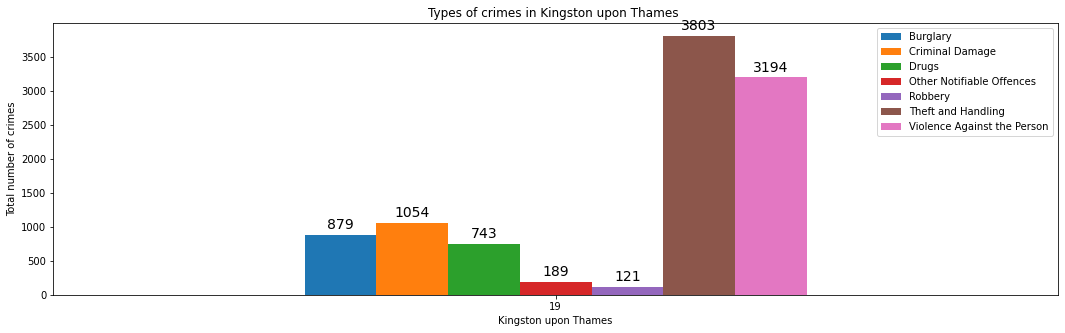

In [41]:
ax = result.plot(kind='bar', figsize=(18,5), rot=0)
plt.title('Types of crimes in Kingston upon Thames ')
plt.ylabel('Total number of crimes')
plt.xlabel('Kingston upon Thames')

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2),
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14
               )

plt.show()

We conclude that Kingston upon Thames is the safest city in London

<h3> Modelling </h3>
1. Getting cities which are at 500m distance to Kingston Upon Thames
<br>
2. Create clusters to figure out the safest place there

In [42]:
##fetching cities in 500m radius around Kingston Upon Thames
import requests # library to handle requests
from geopy.geocoders import Nominatim

#using forsquare api
client_id = 'M3ZJ2RSPQTQJ0W4CYTJSFBM2OLNZTJHXQSVSLX2Y2C0W4S5U'
client_secret = 'AZE0TKN4EV4DUI21MV2M1RWAECZSQPR4Q25ZGYSD42BTQQ21'
version = '20200501'
limit = 30
radius = 500

address = 'Kingston Upon Thames'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(client_id, client_secret, latitude, longitude, version, radius, limit)
 
results = requests.get(url).json()
results

51.4096275 -0.3062621


{'meta': {'code': 200, 'requestId': '5eaf904d71c428001b486a8d'},
 'response': {'venues': [{'id': '5ad1fb62f0b490596e714f23',
    'name': 'Little Ginger',
    'location': {'address': 'Market Place',
     'lat': 51.409804,
     'lng': -0.306347,
     'labeledLatLngs': [{'label': 'display',
       'lat': 51.409804,
       'lng': -0.306347}],
     'distance': 20,
     'postalCode': 'KT1',
     'cc': 'GB',
     'city': 'Kingston',
     'state': 'Greater London',
     'country': 'United Kingdom',
     'formattedAddress': ['Market Place',
      'Kingston',
      'Greater London',
      'KT1',
      'United Kingdom']},
    'categories': [{'id': '4bf58dd8d48988d1d3941735',
      'name': 'Vegetarian / Vegan Restaurant',
      'pluralName': 'Vegetarian / Vegan Restaurants',
      'shortName': 'Vegetarian / Vegan',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/vegetarian_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1588564333',
    'hasPerk': F

In [ ]:
# keep only columns that include venue name, and anything that is associated with location
'''
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
#dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered.head()
'''

In [43]:
data = results['response']['venues']
fin = []
for i in data:
    a= i['categories']
    for j in a:
        b = j['name']
        fin.append(b) #store value of for loop
        
print(fin)

['Vegetarian / Vegan Restaurant', 'Market', 'Coffee Shop', 'Food Stand', 'Bakery', 'Monument / Landmark', 'Clothing Store', 'Bank', 'Asian Restaurant', 'Cosmetics Shop', 'Food Stand', 'Creperie', 'Pub', 'Coffee Shop', 'Building', 'Italian Restaurant', 'Bakery', 'Vietnamese Restaurant', 'Supplement Shop', 'Accessories Store', 'Beer Bar', 'Health Food Store', 'Café', 'Furniture / Home Store', 'Clothing Store', 'Boutique', 'BBQ Joint', 'Food Truck', 'Bridge']


In [44]:
st = pd.DataFrame(fin, columns=['Shop Type'])
st

,Shop Type
0,Vegetarian / Vegan Restaurant
1,Market
2,Coffee Shop
3,Food Stand
4,Bakery
5,Monument / Landmark
6,Clothing Store
7,Bank
8,Asian Restaurant
9,Cosmetics Shop


In [45]:
from pandas.io.json import json_normalize

ans = results['response']['venues']
dataframe = json_normalize(ans)
dataframe.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.neighborhood,location.postalCode,location.state,name,referralId,venuePage.id
0,"[{'id': '4bf58dd8d48988d1d3941735', 'name': 'V...",False,5ad1fb62f0b490596e714f23,Market Place,GB,Kingston,United Kingdom,NaN,20,"[Market Place, Kingston, Greater London, KT1, ...","[{'label': 'display', 'lat': 51.409804, 'lng':...",51.409804,-0.306347,NaN,KT1,Greater London,Little Ginger,v-1588564333,NaN
1,"[{'id': '50be8ee891d4fa8dcc7199a7', 'name': 'M...",False,4c8b873c1797236a4e9e6b88,High St,GB,Kingston,United Kingdom,NaN,3,"[High St, Kingston, Greater London, KT1, Unite...","[{'label': 'display', 'lat': 51.40959961696534...",51.409600,-0.306265,NaN,KT1,Greater London,Kingston Market Place,v-1588564333,NaN
2,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",False,4c2725fcc11dc9b66d272a24,34 Market Pl,GB,Kingston,United Kingdom,NaN,15,"[34 Market Pl, Kingston, Greater London, KT1 1...","[{'label': 'display', 'lat': 51.40952000622245...",51.409520,-0.306129,NaN,KT1 1JQ,Greater London,Costa Coffee,v-1588564333,NaN
3,"[{'id': '56aa371be4b08b9a8d57350b', 'name': 'F...",False,59144164e075500e963fb3f8,NaN,GB,NaN,United Kingdom,NaN,21,"[KT1 1JT, United Kingdom]","[{'label': 'display', 'lat': 51.409618, 'lng':...",51.409618,-0.306575,NaN,KT1 1JT,NaN,Chilli Cha Cha,v-1588564333,NaN
4,"[{'id': '4bf58dd8d48988d16a941735', 'name': 'B...",False,4b7d3cc8f964a5201bb42fe3,28 Market Pl,GB,Kingston,United Kingdom,NaN,17,"[28 Market Pl, Kingston, Greater London, KT1 1...","[{'label': 'display', 'lat': 51.40971557016308...",51.409716,-0.306059,NaN,KT1 1JH,Greater London,Greggs,v-1588564333,NaN


In [46]:
dataframe.drop(['categories','hasPerk','id','location.labeledLatLngs','referralId','venuePage.id','location.cc','location.crossStreet','location.formattedAddress'], axis=1, inplace = True)

In [47]:
dataframe.head()

,location.address,location.city,location.country,location.distance,location.lat,location.lng,location.neighborhood,location.postalCode,location.state,name
0,Market Place,Kingston,United Kingdom,20,51.409804,-0.306347,NaN,KT1,Greater London,Little Ginger
1,High St,Kingston,United Kingdom,3,51.409600,-0.306265,NaN,KT1,Greater London,Kingston Market Place
2,34 Market Pl,Kingston,United Kingdom,15,51.409520,-0.306129,NaN,KT1 1JQ,Greater London,Costa Coffee
3,NaN,NaN,United Kingdom,21,51.409618,-0.306575,NaN,KT1 1JT,NaN,Chilli Cha Cha
4,28 Market Pl,Kingston,United Kingdom,17,51.409716,-0.306059,NaN,KT1 1JH,Greater London,Greggs


In [48]:
dataframe = dataframe[['name','location.distance','location.address','location.city',
                      'location.state','location.country','location.postalCode','location.lat',
                      'location.lng','location.neighborhood']]

In [49]:
dataframe.head()

,name,location.distance,location.address,location.city,location.state,location.country,location.postalCode,location.lat,location.lng,location.neighborhood
0,Little Ginger,20,Market Place,Kingston,Greater London,United Kingdom,KT1,51.409804,-0.306347,NaN
1,Kingston Market Place,3,High St,Kingston,Greater London,United Kingdom,KT1,51.409600,-0.306265,NaN
2,Costa Coffee,15,34 Market Pl,Kingston,Greater London,United Kingdom,KT1 1JQ,51.409520,-0.306129,NaN
3,Chilli Cha Cha,21,NaN,NaN,NaN,United Kingdom,KT1 1JT,51.409618,-0.306575,NaN
4,Greggs,17,28 Market Pl,Kingston,Greater London,United Kingdom,KT1 1JH,51.409716,-0.306059,NaN


In [50]:
dataframe.columns = ['Name', 'Distance','Address','City','State','Country','Pin Code','Lat','Long','Neighbor']

In [51]:
dataframe.head()

,Name,Distance,Address,City,State,Country,Pin Code,Lat,Long,Neighbor
0,Little Ginger,20,Market Place,Kingston,Greater London,United Kingdom,KT1,51.409804,-0.306347,NaN
1,Kingston Market Place,3,High St,Kingston,Greater London,United Kingdom,KT1,51.409600,-0.306265,NaN
2,Costa Coffee,15,34 Market Pl,Kingston,Greater London,United Kingdom,KT1 1JQ,51.409520,-0.306129,NaN
3,Chilli Cha Cha,21,NaN,NaN,NaN,United Kingdom,KT1 1JT,51.409618,-0.306575,NaN
4,Greggs,17,28 Market Pl,Kingston,Greater London,United Kingdom,KT1 1JH,51.409716,-0.306059,NaN


In [52]:
details = dataframe.join(st)

In [53]:
details.head()

,Name,Distance,Address,City,State,Country,Pin Code,Lat,Long,Neighbor,Shop Type
0,Little Ginger,20,Market Place,Kingston,Greater London,United Kingdom,KT1,51.409804,-0.306347,NaN,Vegetarian / Vegan Restaurant
1,Kingston Market Place,3,High St,Kingston,Greater London,United Kingdom,KT1,51.409600,-0.306265,NaN,Market
2,Costa Coffee,15,34 Market Pl,Kingston,Greater London,United Kingdom,KT1 1JQ,51.409520,-0.306129,NaN,Coffee Shop
3,Chilli Cha Cha,21,NaN,NaN,NaN,United Kingdom,KT1 1JT,51.409618,-0.306575,NaN,Food Stand
4,Greggs,17,28 Market Pl,Kingston,Greater London,United Kingdom,KT1 1JH,51.409716,-0.306059,NaN,Bakery


In [54]:
details = details[['Name','Shop Type','Distance','Address','City','State','Country','Pin Code','Lat','Long','Neighbor']]
details.head()

,Name,Shop Type,Distance,Address,City,State,Country,Pin Code,Lat,Long,Neighbor
0,Little Ginger,Vegetarian / Vegan Restaurant,20,Market Place,Kingston,Greater London,United Kingdom,KT1,51.409804,-0.306347,NaN
1,Kingston Market Place,Market,3,High St,Kingston,Greater London,United Kingdom,KT1,51.409600,-0.306265,NaN
2,Costa Coffee,Coffee Shop,15,34 Market Pl,Kingston,Greater London,United Kingdom,KT1 1JQ,51.409520,-0.306129,NaN
3,Chilli Cha Cha,Food Stand,21,NaN,NaN,NaN,United Kingdom,KT1 1JT,51.409618,-0.306575,NaN
4,Greggs,Bakery,17,28 Market Pl,Kingston,Greater London,United Kingdom,KT1 1JH,51.409716,-0.306059,NaN


In [55]:
#Clustering based on similar neighbours
!pip install --user scikit-learn

In [56]:
nearby = pd.DataFrame(details[['Name','Distance','Lat','Long']])
nearby.head()

,Name,Distance,Lat,Long
0,Little Ginger,20,51.409804,-0.306347
1,Kingston Market Place,3,51.409600,-0.306265
2,Costa Coffee,15,51.409520,-0.306129
3,Chilli Cha Cha,21,51.409618,-0.306575
4,Greggs,17,51.409716,-0.306059


In [71]:
#nearby.sort_values(by ='Distance', inplace = True, ascending = True, na_position = 'last')
#nearby.reset_index(inplace = True) 
#nearby.drop(['index'], axis = 1, inplace = True)
nearby.head()

,Cluster Labels,Name,Distance,Lat,Long
0,1,Little Ginger,20,51.409804,-0.306347
1,4,Kingston Market Place,3,51.409600,-0.306265
2,1,Costa Coffee,15,51.409520,-0.306129
3,1,Chilli Cha Cha,21,51.409618,-0.306575
4,1,Greggs,17,51.409716,-0.306059


In [59]:
!pip3 install -U scikit-learn

Requirement already up-to-date: scikit-learn in /Users/gargishukla/.local/lib/python3.7/site-packages (0.22.2.post1)


In [ ]:
!pip install --upgrade pip

In [75]:
x = nearby.iloc[:, [1,2,3]].values

In [98]:
import sklearn
from sklearn.cluster import KMeans

# set number of clusters
kclusters = 5

#df = DataFrame(nearby,columns=['Name','Distance'])
kmeans = KMeans(init = "k-means++", n_clusters = kclusters, n_init = 12)
kmeans.fit(x)
y = kmeans.fit_predict(x)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
print(centroids)
print(labels)

[[92.5        51.40951486 -0.3067111 ]
 [20.875      51.40972294 -0.30630651]
 [60.85714286 51.4094712  -0.30599471]
 [ 9.71428571 51.40955247 -0.30619195]
 [41.5        51.40963769 -0.30610346]]
[1 3 3 1 1 1 2 1 1 1 3 4 4 2 4 4 1 4 3 4 2 2 2 2 2 0 3 3 3 0]


In [99]:
nearby.insert(0, 'Cluster Labels', kmeans.labels_)

In [74]:
#nearby.drop(['Cluster Labels'], axis = 1 , inplace = True)

<H2> Visualising Clusters </H2>

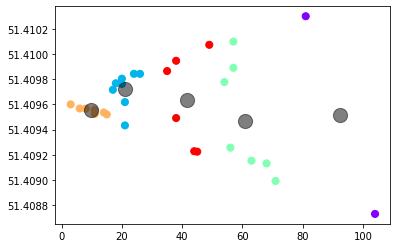

In [100]:
import matplotlib.pyplot as plt

plt.scatter(x[:, 0], x[:, 1], c=y, s=50, cmap='rainbow')
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=200, alpha=0.5);
plt.show()

In [101]:
import folium
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11.5)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(nearby['Lat'], nearby['Long'], nearby['Name'], nearby['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=8,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.5).add_to(map_clusters)
       
map_clusters

<H2> Analysis </H2>
<br>
Analyse each of the clusters to identify the characteristics of each cluster and the neighborhoods in them.
<br><br>
<b>Examining the first cluster</b>

In [102]:
nearby[nearby['Cluster Labels'] == 0]

,Cluster Labels,Name,Distance,Lat,Long
25,0,The Edinburgh Woollen Mill,81,51.410299,-0.306735
29,0,Clattern Bridge,104,51.408731,-0.306687


This cluter represents shops and cities farthest to Kingston Upon Thames 

In [103]:
nearby[nearby['Cluster Labels'] == 1]

,Cluster Labels,Name,Distance,Lat,Long
0,1,Little Ginger,20,51.409804,-0.306347
3,1,Chilli Cha Cha,21,51.409618,-0.306575
4,1,Greggs,17,51.409716,-0.306059
5,1,Market House,24,51.409842,-0.306308
7,1,NatWest,21,51.409433,-0.306297
8,1,Phoreal,26,51.409842,-0.306412
9,1,Lush Spa,20,51.409762,-0.306060
16,1,Knot Pretzels,18,51.409767,-0.306394


We can see that this cluster is amongst popular locations because of presence of 9 shops near to Kingston Upon Thames.

In [104]:
nearby[nearby['Cluster Labels'] == 2]

,Cluster Labels,Name,Distance,Lat,Long
6,2,Next,63,51.409153,-0.306763
13,2,The Terrace Coffee Shop,68,51.409131,-0.305685
20,2,7000 Jars Of Beer,54,51.409777,-0.305510
21,2,John Rose Eyecare,71,51.408992,-0.306149
22,2,Food For Thought,57,51.409890,-0.305549
23,2,Fortunella,56,51.409257,-0.305709
24,2,The White Company,57,51.410098,-0.306598


We can see that this cluster is third most popular near to Kingston Upon Thames.

In [105]:
nearby[nearby['Cluster Labels'] == 4]

,Cluster Labels,Name,Distance,Lat,Long
11,4,The Crêpe Escape,38,51.409946,-0.306051
12,4,The Druid's Head,45,51.409225,-0.306403
14,4,Headquarters Salon,44,51.409228,-0.306187
15,4,Giuliano Italian Delicafe,38,51.409491,-0.305751
17,4,What Da Pho,35,51.409864,-0.305918
19,4,Sunglass Hut,49,51.410072,-0.306312


We can see that this cluster is nearest yet third most popular near to Kingston Upon Thames.

In [106]:
nearby[nearby['Cluster Labels'] == 3]

,Cluster Labels,Name,Distance,Lat,Long
1,3,Kingston Market Place,3,51.409600,-0.306265
2,3,Costa Coffee,15,51.409520,-0.306129
10,3,Rooster Run,11,51.409523,-0.306224
18,3,GNC,8,51.409566,-0.306201
26,3,Lipsy London,14,51.409536,-0.306115
27,3,Swine'N'Dine,11,51.409556,-0.306148
28,3,Bang Wok,6,51.409567,-0.306262


We can see that this cluster is second most popular near to Kingston Upon Thames.

<H2> Results and Discussion </H2>
<br>
The aim of this project is to help people who wants to explore and know about the safest towns and places in London. Based on the distance and economic factors one can choose to live in nearby cities too. If any shopkeeper wants to setup a business they too can get an idea of which place is the most popular and safest location for them to start a small business. If someone chooses to live in a very lively place, she or he may choose to live in or near to Cluster 1. This is the most suited and accessible place from a living point of view and is ideal for a family.
<br><br>
<h2>Conclusion </h2>
<br>
This project helps a person get a better understanding of the neighborhoods with respect to the most common venues in that neighborhood. This project has only considered safety as a filter to shortlist the towns of London. The future of this project includes studying other factors such as cost of living to shortlist the towns based on safety and a predefined budget.